 Importing the Libraries

In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the data file to pandas dataframe

In [2]:
data = pd.read_csv('downloads\data_2_var.csv')

Exploratory Data Analysis

In [3]:
data.head()

,-122.7406674,-130.5720846
0,-121.531419,-129.938929
1,-134.917019,-130.141832
2,-120.605951,-125.760932
3,-129.894781,-112.785214
4,-134.366669,-116.000000


In [4]:
data.tail()

,-122.7406674,-130.5720846
1105,-115.366669,121.000000
1106,-119.954237,123.609122
1107,-109.942155,127.197394
1108,-111.515368,128.170885
1109,-110.344221,123.087950


In [5]:
data.shape

(1110, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   -122.7406674  1110 non-null   float64
 1   -130.5720846  1110 non-null   float64
dtypes: float64(2)
memory usage: 17.5 KB


In [8]:
missing_columns = (round(((data.isnull().sum()/len(data.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
missing_columns

,null
-122.7406674,0.0
-130.5720846,0.0


No missing Data

In [9]:
data.describe()

,-122.7406674,-130.5720846
count,1110.000000,1110.000000
mean,6.899714,-26.093318
std,79.324069,69.755980
min,-134.962839,-132.422167
25%,-53.366669,-76.994298
50%,15.739103,-46.036319
75%,76.193907,7.598960
max,134.605775,134.425495


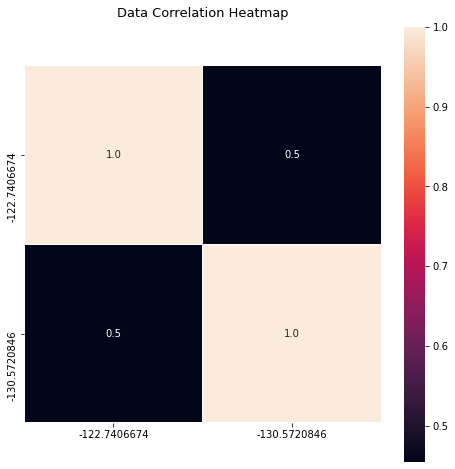

In [10]:
correlation = data.corr()
plt.figure(figsize = (8,8))
sns.heatmap(correlation, xticklabels = correlation.columns.values,square = True, yticklabels = correlation.columns.values, annot = True, fmt = '.1f', linewidths = 0.30)
plt.title('Data Correlation Heatmap', y = 1.12, size = 13, loc = "center")
plt.show()

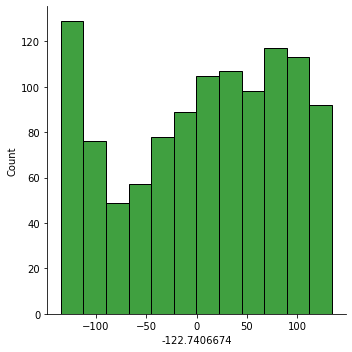

In [14]:
sns.displot(data['-122.7406674'], color = 'green')

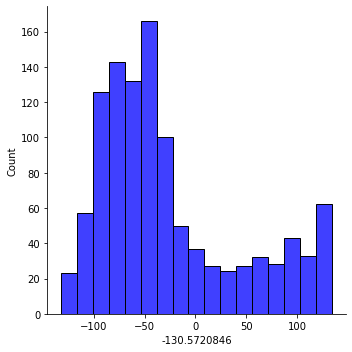

In [12]:
sns.displot(data['-130.5720846'], color = 'blue')

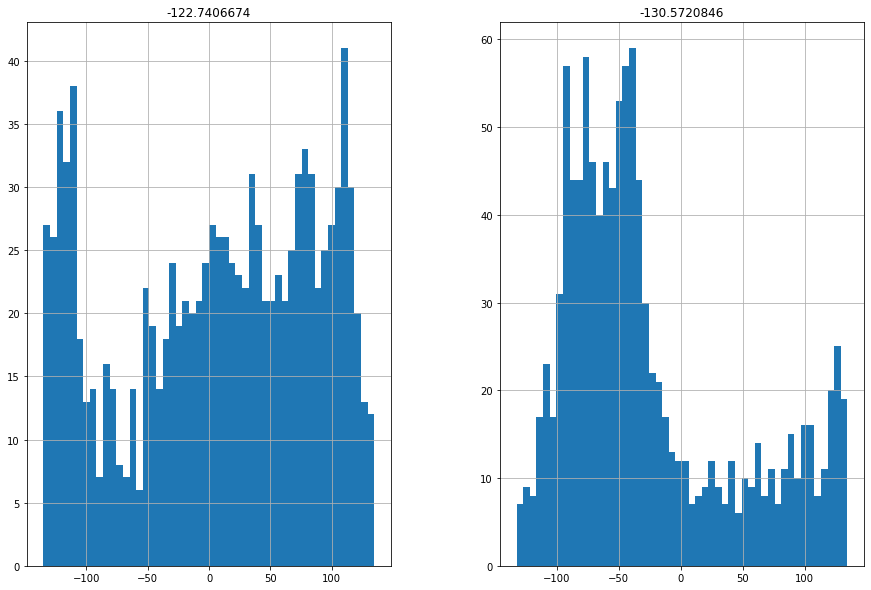

In [13]:
data.hist(bins = 50, figsize = (15,10))
plt.show()

C:\Users\mayank nagar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\mayank nagar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


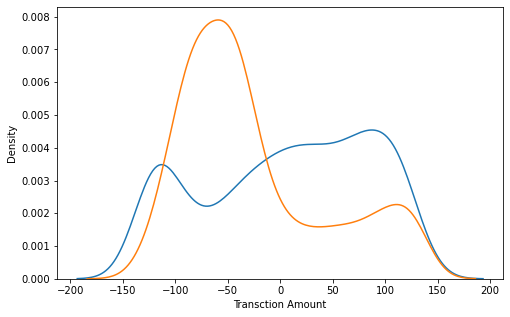

In [15]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data['-122.7406674'],label='fraudulent',hist=False)
ax = sns.distplot(data['-130.5720846'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

In [16]:
Y = data[['-130.5720846']]

In [19]:
X = data['-122.7406674']

In [20]:
X.head()

0   -121.531419
1   -134.917019
2   -120.605951
3   -129.894781
4   -134.366669
Name: -122.7406674, dtype: float64

In [21]:
Y.head()

,-130.5720846
0,-129.938929
1,-130.141832
2,-125.760932
3,-112.785214
4,-116.000000


# Linear Regression

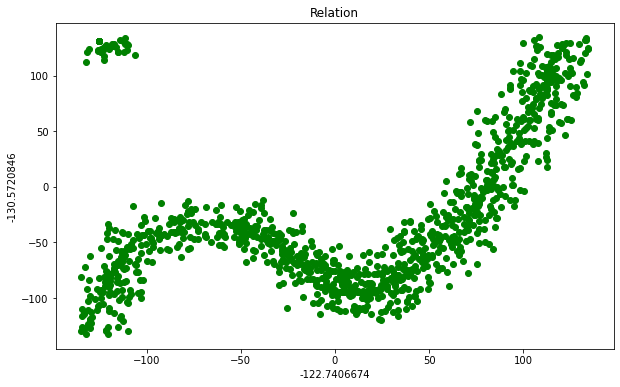

In [24]:
plt.figure(figsize=(10,6))
plt.xlabel('-122.7406674')
plt.ylabel('-130.5720846')
plt.title('Relation')
plt.scatter(X,Y, marker='o', color='g')

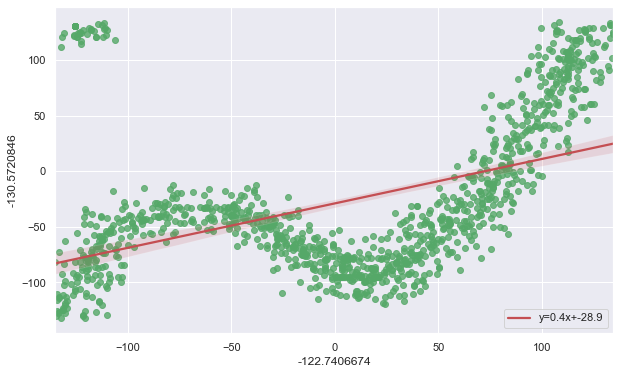

In [26]:
from scipy import stats
sns.set(color_codes=True)

slope, intercept, r_value, p_value, std_err = stats.linregress(data['-122.7406674'],data['-130.5720846'])

f = plt.figure(figsize=(10,6))
data = data[['-122.7406674','-130.5720846']]
ax = sns.regplot(x='-122.7406674', y='-130.5720846', data=data, 
                 scatter_kws={"color": "g"}, 
                line_kws={'color': 'r', 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
ax.legend()

In [27]:
print(slope, intercept)

0.39977253850242206 -28.85163397847335


In [28]:
print(std_err)

0.02353065943854233


In [44]:
Y = data[['-130.5720846']]

In [45]:
X = data[['-122.7406674']]

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=42)

In [49]:
# Creating the regressor: reg_all
reg_all = LinearRegression()

In [50]:
reg_all.fit(X_train, Y_train)

LinearRegression()

In [54]:
# Predict on the test data: y_pred
Y_pred = reg_all.predict(X_test)

In [55]:
print("R^2: {}".format(reg_all.score(X_test, Y_test)))
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.20793970195796918
Root Mean Squared Error: 60.31050337981382
